# 6. 회문 암호

동적계획법을 처음 적용해본 문제여서 배우는 점이 많았습니다. 교수님이 말씀하신 것처럼 "동적계획법으로 풀면 좋다"는 사실을 알면 쉽게 풀리지만, 그렇지 않으면 정말 어렵게 풀리는 문제인 것 같습니다.  

알고리즘 강의를 마지막 학기에 들어서 참 다행이라는 생각이 듭니다.

## 문제

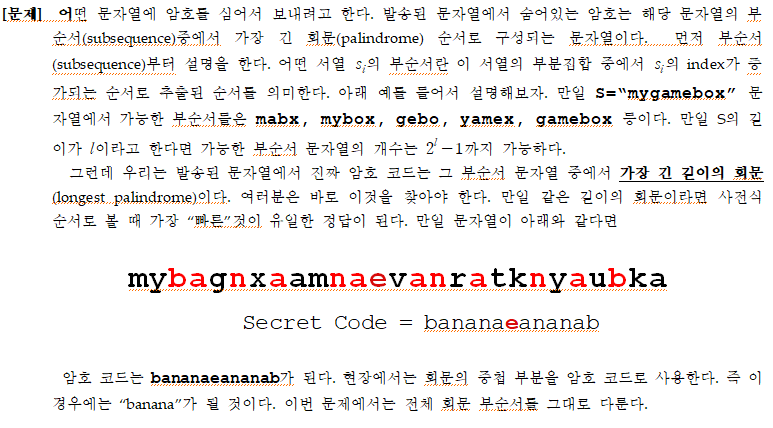

## 입출력

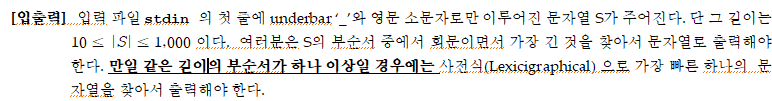

## 기본 세팅

In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True) # gdrive 수정 가능하게 함

Mounted at /content/drive/


In [ ]:
# 수정
add = "_6_회문암호(동적계획법)/"

PROJECT_DIR = "/content/drive/MyDrive/2022년/1학기/Computer_Algorithm/과제 파일/" + add

def inp_pth(i):
  return PROJECT_DIR + 'sample/0' + str(i) + '.inp'

def out_pth(i):
  return PROJECT_DIR + 'sample/0' + str(i) + '.out'

In [ ]:
def test(class_):
  for i in range(1, 6):
    print(f"[{i}]")
    inp_path = inp_pth(i)
    with open(inp_path, 'r') as inp:
      input = inp.readlines()
    
    out_path = out_pth(i)
    with open(out_path) as out:
      answer = out.readlines()
    
    for j, input_ in enumerate(input):
      result = class_.out(input_)
      print(f"{result == answer[j]}\n result: {result} answer: {answer[j]}")


## 풀이

$
Let\ s(i,\ j)\ to\ be\ a\ secret\ hidden\ in\ given\ text\ T. \\
Then...
$  



1) $s(i\ ,\ i) = T[i]$  
2) $s(i\ ,\ i+1) =  \begin{cases}
T[i:\ i+1], & \mbox{if }\ T[i]\mbox{ = T[i+1]} \\
min_{dictionary\ order}(T[i],\ T[i+1]), & \mbox{if }\ T[i]\mbox{ is not T[i+1]}
\end{cases}$  
3) $s(i\ ,\ j) =  \begin{cases}
T[i]\ +\ s(i+1,\ j-1)\ +\ T[j] , & \mbox{if }\ T[i]\mbox{ = T[j]} \\
max_{length}(s(i+1,\ j),\ s(i,\ j-1)), & \mbox{else}
\end{cases}
$

예시  
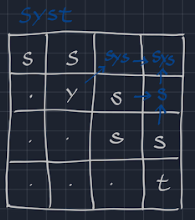

In [ ]:
class algorithm:
  def input(self, inp):
    self.table = []
    self.inp = inp

    # 초기값 세팅
    for i in range(len(inp)):
      self.table.append([])

    for i in range(len(inp)):
      for j in range(i + 1):
        if i == j:
          self.table[i].append(inp[i])
        else:
          self.table[i].append('.')

    for i in range(len(inp)-1):
      if inp[i] == inp[i+1]:
        self.table[i].append(inp[i:i+2])
      else:
        self.table[i].append(min(inp[i], inp[i+1]))
  
  def secret(self, i, j):
    if self.inp[i] == self.inp[j]:
      return self.inp[i] + self.table[i+1][j-1] + self.inp[j]

    else:
      down = self.table[i+1][j]
      left = self.table[i][j-1]
      if len(down) > len(left):
        return down
      elif len(down) < len(left):
        return left
      else:
        return min(down, left)    
  
  def create_table(self):
    for delta in range(2, len(self.inp)):
      for i in range(0, len(self.inp) - delta):
        self.table[i].append(self.secret(i, i+delta))

  def out(self, inp):
    self.input(inp)
    self.create_table()

    return self.table[0][-1] +'/n'

In [ ]:
%%time
test = "system_computer_language_intelligence"

al = algorithm()
result = al.out(test)
print(result)

ecelngagnlece

CPU times: user 3.06 ms, sys: 947 µs, total: 4.01 ms
Wall time: 8.57 ms


In [ ]:
test(al)

[1]
True
result: a
answer: a

[2]
True
result: fgf
answer: fgf

[3]
True
result: ei_mm_ie
answer: ei_mm_ie

[4]
True
result: ecelngagnlece
answer: ecelngagnlece

[5]
True
result: bananaeananab
answer: bananaeananab



## 최종 제출 파일

In [ ]:
#code.py

class algorithm:
  def input(self, inp):
    self.table = []
    self.inp = inp

    # 초기값 세팅
    for i in range(len(inp)):
      self.table.append([])

    for i in range(len(inp)):
      for j in range(i + 1):
        if i == j:
          self.table[i].append(inp[i])
        else:
          self.table[i].append('.')

    for i in range(len(inp)-1):
      if inp[i] == inp[i+1]:
        self.table[i].append(inp[i:i+2])
      else:
        self.table[i].append(min(inp[i], inp[i+1]))
  
  def secret(self, i, j):
    if self.inp[i] == self.inp[j]:
      return self.inp[i] + self.table[i+1][j-1] + self.inp[j]

    else:
      down = self.table[i+1][j]
      left = self.table[i][j-1]
      if len(down) > len(left):
        return down
      elif len(down) < len(left):
        return left
      else:
        return min(down, left)    
  
  def create_table(self):
    for delta in range(2, len(self.inp)):
      for i in range(0, len(self.inp) - delta):
        self.table[i].append(self.secret(i, i+delta))

  def out(self, inp):
    self.input(inp)
    self.create_table()

    return self.table[0][-1] +'/n'

al = algorithm()
input = input()
print(al.out(input))

## 결과

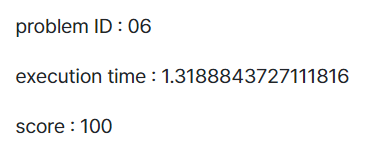